In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
import math
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - x*4 + 5

In [3]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

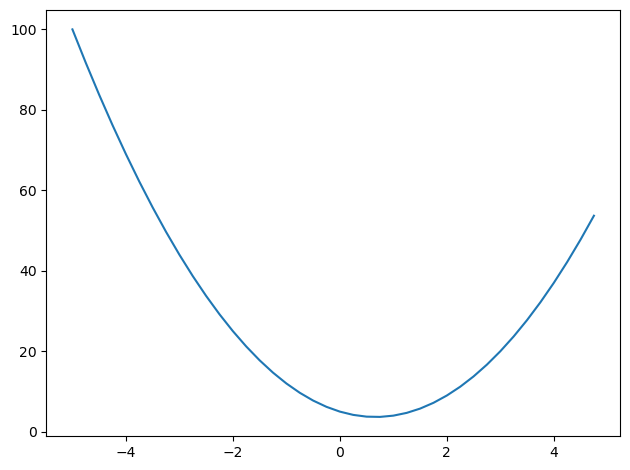

In [4]:
# plt.figure(figsize=(10,6))
plt.plot(xs, ys)
plt.tight_layout()
plt.show()

# Definition of Differentiability

A function of a real variable $f(x)$ is **differentiable** at a point $a$ of its domain, if its domain contains an open interval containing $a$, and the limit

$$L = \lim_{h \to 0} \frac{f(a+h) - f(a)}{h}$$

exists and is finite.

## Notes:

- The limit $L$ is called the **derivative** of $f$ at $a$, denoted as $f'(a)$ or $\frac{df}{dx}\bigg|_{x=a}$
- The expression $\frac{f(a+h) - f(a)}{h}$ is called the **difference quotient**
- For the function to be differentiable at $a$, both the left-hand and right-hand limits must exist and be equal


In [5]:
h = 0.0000001
x = -3
(f(x + h) - f(x))/h

-21.999999688659955

In [6]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
c += h
d2 = a * b + c
print("d1", d1)
print("d2", d2)
print("slope", (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), _op='+')
        def _backward():
            self.grad = 0.1 * other.grad
            other.grad = 0.1 * other.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), _op='*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1)/ (np.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        def _backward():
            self.grad = (1 - t)**out.grad
        out._backward = _backward
        return out

a = Value(2, label='a')
b = Value(-3, label='b')
c = Value(10, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8)

In [8]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={"rankdir": 'LR'})
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = '{ %s | data %.4f | grad %f }' % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label=n._op)
            dot.edge(uid + n._op , uid)
            
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

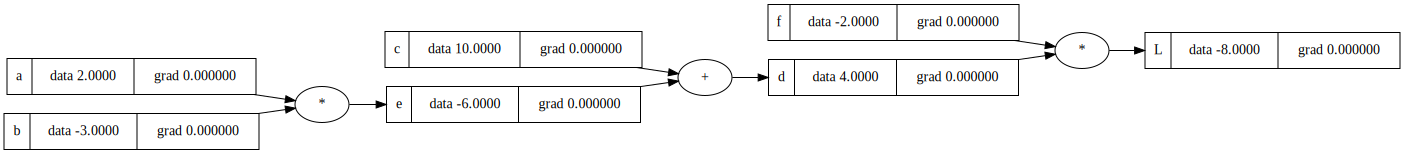

In [9]:
draw_dot(L)

In [10]:
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

In [11]:
# dl/da?
# dl/de = -2
# e = a*b
#de/da = b

# dl/da = dl/de * de/da
# dl/da = -2 * -3

In [12]:
c.grad = d.grad
e.grad = d.grad

In [13]:
f.grad = d.data
d.grad = f.data

In [14]:
L.grad = 1.0

In [15]:
def lol():
    h = 0.001
    a = Value(2, label='a')
    b = Value(-3, label='b')
    c = Value(10, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2, label='a')
    b = Value(-3, label='b')
    b.data+=h
    c = Value(10, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2, label='f')
    L = d * f; L.label = 'L'
    L2= L.data
    
    print((L2 - L1)/h)

lol()

-3.9999999999995595


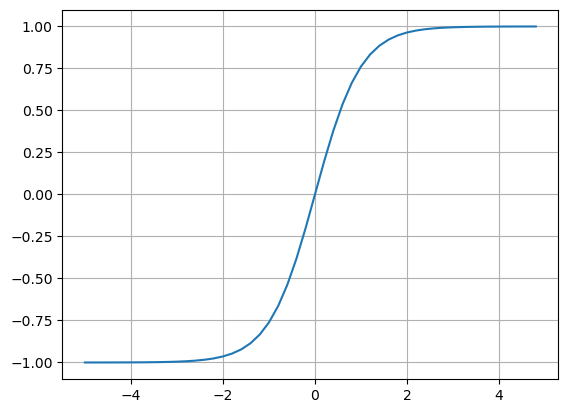

In [16]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid(); plt.show()

In [17]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# biasof the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 =  x1*w1; x1w1.label='x1*w1'
x2w2 =  x2*w2; x2w2.label='x2*w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label ='x1w1+x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

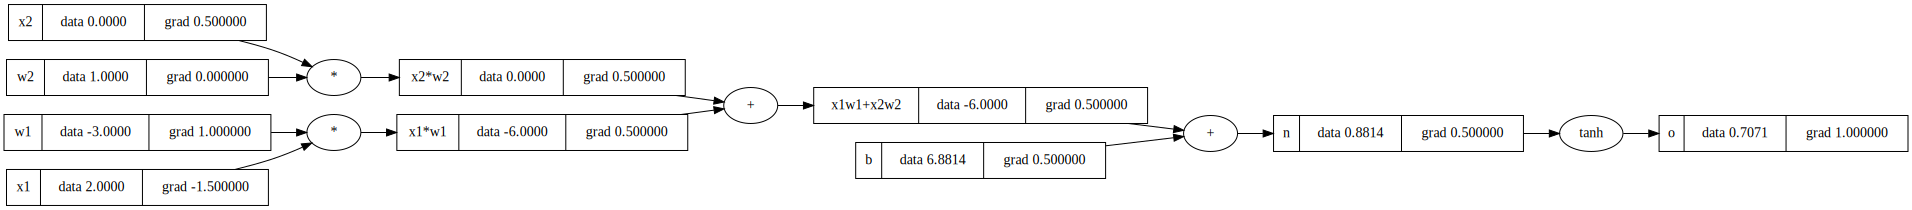

In [31]:
draw_dot(o)

In [30]:
x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data

x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data

In [28]:
x1w1.grad = x1w1x2w2.grad
x2w2.grad =x1w1x2w2.grad

In [26]:
x1w1x2w2.grad = n.grad
b.grad = n.grad

In [22]:
n.grad = 1-o.data**2

In [23]:
o.grad = 1

In [24]:
# do/dn = 1 - tanh(n)**2
1-o.data**2

np.float64(0.4999999999999999)